# Random Forest Algorithm predictor

In [ ]:
#importing libraries

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from osgeo import gdal, osr, ogr
np.random.seed(0) #setting random seed
import matplotlib.pyplot as plt
import pickle 
import fastparquet as fp

In [46]:
#load the file to predict (raster file saved in parquet format)

rasterDf=fp.ParquetFile('/content/sample_data/raster.parquet').to_pandas()

In [47]:
puneAnt= gdal.Open('/content/drive/MyDrive/image_2022ekm.tif',0)
row= puneAnt.RasterYSize
col=puneAnt.RasterXSize
print(row,col)

1907 3430


In [48]:
#load the saved model
filename = '/content/drive/MyDrive/BigGeoProj/rfekm02.sav'  # Replace with the path and filename of the saved model
clf = pickle.load(open(filename, 'rb'))

In [49]:
prediction=clf.predict(rasterDf)  #predicitng on our input satellite image data (here ernakulam data)
prediction

array([4, 4, 4, ..., 4, 4, 4])

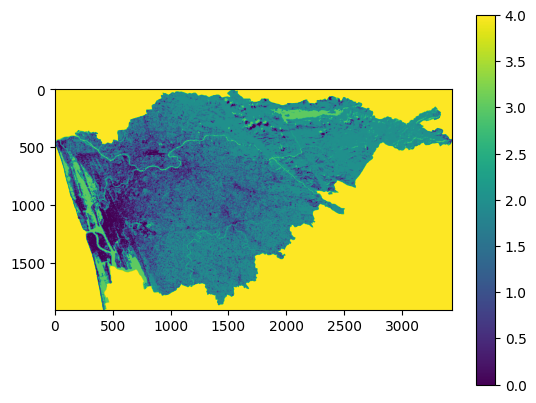

In [50]:
prediction=prediction.reshape(1907, 3430)
plt.imshow(prediction)
plt.colorbar()

In [51]:
output_file = "/content/sample_data/ekm03.tif"
driver = gdal.GetDriverByName("GTiff")
trans=(76.16482917394299, 0.00026949458523585647, 0.0, 10.302777993566792, 0.0, -0.00026949458523585647)

# get the spatial reference system of the data (optional)
srs = osr.SpatialReference()
srs.ImportFromEPSG(4326)  # set to WGS84

# create a new GeoTIFF file with one band
dst_ds = driver.Create(output_file, prediction.shape[1], prediction.shape[0], 1, gdal.GDT_Float32)
dst_ds.SetGeoTransform(trans)
# set the projection (optional)
dst_ds.SetProjection(srs.ExportToWkt())

prediction = prediction.astype(np.float32)
prediction[prediction == 4] = np.nan

# write the data to the GeoTIFF file
dst_ds.GetRasterBand(1).WriteArray(prediction)

# close the file
dst_ds = None

In [52]:
clf=None
prediction=None